In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\amamr\OneDrive\Desktop\Fruits and Vegetable Recogination\archive (1)\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\amamr\OneDrive\Desktop\Fruits and Vegetable Recogination\archive (1)\validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [11]:
cnn = tf.keras.models.Sequential()

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [17]:
cnn.add(tf.keras.layers.Flatten())

In [18]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [19]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [20]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [21]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [22]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,404,804 (5.36 MB)

 Trainable params: 1,404,804 (5.36 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 675ms/step - accuracy: 0.0306 - loss: 5.9168 - val_accuracy: 0.0541 - val_loss: 3.4377
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 50s 512ms/step - accuracy: 0.0556 - loss: 3.4053 - val_accuracy: 0.0741 - val_loss: 3.1904
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 52s 526ms/step - accuracy: 0.0684 - loss: 3.2454 - val_accuracy: 0.1339 - val_loss: 2.9169
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 525ms/step - accuracy: 0.1104 - loss: 3.0915 - val_accuracy: 0.1880 - val_loss: 2.7553
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 50s 503ms/step - accuracy: 0.1329 - loss: 2.9812 - val_accuracy: 0.2650 - val_loss: 2.5704
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 497ms/step - accuracy: 0.1549 - loss: 2.8508 - val_accuracy: 0.3276 - val_loss: 2.2519
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 488ms/step - accuracy: 0.2048 - loss: 2.6661 - val_accuracy: 0.3447 - val_loss: 2.0525
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 476ms/step - accuracy: 0.2253 - loss: 2.5393 - val_accu

In [26]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 331ms/step - accuracy: 0.9114 - loss: 0.3328
Training accuracy: 0.9197431802749634


In [27]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 383ms/step - accuracy: 0.9209 - loss: 0.4142
Validation accuracy: 0.9202279448509216


In [30]:
cnn.save('my_model.keras')

In [31]:
training_history.history #Return Dictionary of history

{'accuracy': [0.03788122162222862,
  0.060995183885097504,
  0.07447832822799683,
  0.11460673809051514,
  0.13451042771339417,
  0.15826645493507385,
  0.21091492474079132,
  0.23531299829483032,
  0.2584269642829895,
  0.2908507287502289,
  0.32199037075042725,
  0.351845920085907,
  0.3839486241340637,
  0.4118780195713043,
  0.4600321054458618,
  0.4731942117214203,
  0.5184590816497803,
  0.5271267890930176,
  0.5608346462249756,
  0.5817014575004578,
  0.6105939149856567,
  0.6243980526924133,
  0.6571428775787354,
  0.6600320935249329,
  0.7011235952377319,
  0.674799382686615,
  0.6988763809204102,
  0.7463884353637695,
  0.7502407431602478,
  0.7357945442199707,
  0.7762439846992493,
  0.7833065986633301],
 'loss': [4.074140548706055,
  3.373494863510132,
  3.228461980819702,
  3.0860509872436523,
  2.928270101547241,
  2.825211524963379,
  2.611570119857788,
  2.5058517456054688,
  2.4581942558288574,
  2.3337583541870117,
  2.227417469024658,
  2.0843636989593506,
  2.018237

In [32]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [33]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [34]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 92.02279448509216 %


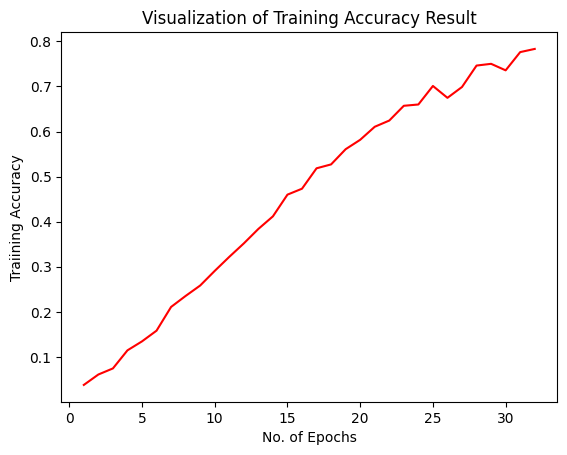

In [38]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

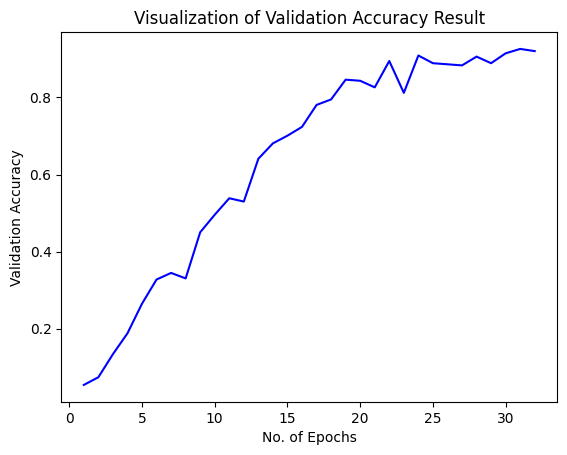

In [39]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [41]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\amamr\OneDrive\Desktop\Fruits and Vegetable Recogination\archive (1)\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [42]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 485ms/step - accuracy: 0.9234 - loss: 0.3584
Test accuracy: 0.9220055937767029
